# Bonus Quest

**Difficulty:** A

**Description:** Students are in a tough spot after changing the grading formula for assignments and now fear taking the exam without a 3.5 GPA. The system gives players a chance to raise their score by completing this bonus quest. This is your Solo Leveling. Survive at all costs. Good luck!

**Goal:** Complete the bonus assignment created by Andrei and corrected by Max.

**Deliverables:**
- Jupyter Notebook (ipynb) file with solution and all cell outputs
- CSV file with model predictions
- Both files uploaded to GitHub repository

**Reward:**
- Bonus points for the Assignment part.
- Title “The one who overcomes the difficulties of fate.”
- +1000 EXP in mastering sklearn
- Skill Upgrade «ML Engineering Lv.2»
- Special Item: [???]

---

## Problem Statement

As a dataset, use Russian news from Balto-Slavic Natural Language Processing 2019 (helsinki.fi). Entities of interest: PER, ORG, LOC, EVT, PRO (see Guidelines_20190122.pdf (helsinki.fi)).

It is sufficient to use 9 documents about Brexit from the sample provided by the organizers.

## Approach

This assignment combines traditional ML methods (using scikit-learn) with modern LLM-based approaches (DeepSeek) for comparison. You will:
1. Formulate the problem as a machine learning task
2. Prepare features and split data appropriately
3. Train and compare multiple models using scikit-learn
4. Evaluate models using proper train/test splits
5. Compare ML model performance with DeepSeek responses
6. Analyze results in terms of course concepts (bias-variance tradeoff, overfitting, generalization)


Example of one document:

ru-10

ru

2018-09-20

https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html

Theresa May expects to stay in the saddle until the completion of the Brexit procedure
However, according to British media reports, at the upcoming Conservative Party conference at the end of September, May's opponents will give her a serious fight, from which it is not certain that she will emerge victorious. The bookmakers' favorite as a possible replacement for the current prime minister, former British Foreign Secretary Boris Johnson intends to deliver an alternative report that will leave no stone unturned from the government's views on the conditions of "Brexit". From Johnson's point of view, "London has wrapped the British constitution in a suicide belt and handed the detonator to Michel Barnier (Brussels' chief Brexit negotiator. - Ed.)". It is with this metaphor that the head of the British government will have to fight at the conference.


### Task 1
**Problem Formulation & ML Perspective**

Describe the task from both NLP and ML perspectives:
- What kind of machine learning problem is this? (classification, sequence labeling, etc.)
- How can this be formulated as a supervised learning problem?
- What classical ML methods exist for solving it? (e.g., logistic regression, naive Bayes, SVM with text features)
- How can it be solved using modern LLMs like DeepSeek?
- What are the assumptions of different model classes? (e.g., linear models vs. more complex approaches)
- How is model quality typically evaluated in this task? What metrics are appropriate and why?


## 1. Introduction
The goal of this assignment is to perform Named Entity Recognition (NER) on Russian news documents related to Brexit from the BSNLP 2019 dataset. We are interested in extracting five specific entity types:
*   **PER** (Person)
*   **ORG** (Organization)
*   **LOC** (Location)
*   **EVT** (Event)
*   **PRO** (Product)

This notebook addresses the theoretical formulation of the problem, comparing traditional Machine Learning (ML) approaches with modern Large Language Model (LLM) techniques.

---

## 2. Problem Description

### NLP Perspective
From a Natural Language Processing (NLP) perspective, this is a **Named Entity Recognition (NER)** task. The objective is to identify spans of text that refer to specific entities and classify them into predefined categories.

*   **Input:** A sequence of raw text (e.g., "Тереза Мэй обсудила Brexit в Лондоне.")
*   **Output:** A sequence of tags or labeled spans (e.g., `[("Тереза Мэй", "PER"), ("Brexit", "EVT"), ("Лондоне", "LOC")]`).

### ML Perspective
From a Machine Learning perspective, this is typically formulated as a **Sequence Labeling** problem or a **Token-level Classification** problem.

#### Formulation as Supervised Learning
To apply supervised learning, we transform the text into discrete units (tokens) and assign a label to each unit.
1.  **Tokenization:** Split text into words/subwords: $X = \{x_1, x_2, ..., x_n\}$.
2.  **Labeling (BIO scheme):** Assign a label $y_i$ to every $x_i$ from a set of classes $C = \{B-PER, I-PER, B-LOC, ..., O\}$.
    *   `B-` indicates the Beginning of an entity.
    *   `I-` indicates Inside an entity.
    *   `O` indicates Outside (no entity).

The model learns a function $f: X \rightarrow Y$ that maps the sequence of features to a sequence of tags.

---

## 3. Methodologies

### Classical ML Methods
Before the deep learning era, NER was solved using statistical models and feature engineering.

1.  **Naive Bayes / Logistic Regression:**
    *   *Approach:* Treat every word as an independent classification instance using a sliding window of context features.
    *   *Limitation:* Does not capture the sequential dependency of labels well (e.g., an `I-PER` tag is very likely to follow a `B-PER` tag).
2.  **Support Vector Machines (SVM):**
    *   *Approach:* Uses high-dimensional feature spaces (word embeddings, capitalization, prefixes/suffixes, part-of-speech tags) to separate classes.
    *   *Limitation:* Like logistic regression, standard SVMs classify tokens independently unless structured output variations (Structural SVMs) are used.
3.  **Conditional Random Fields (CRF):**
    *   *Approach:* The gold standard for pre-neural NER. It models the conditional probability of the entire label sequence $Y$ given the input sequence $X$.
    *   *Advantage:* Explicitly models transition probabilities between tags (e.g., $P(y_i | y_{i-1}, X)$), preventing invalid sequences like `O` -> `I-PER`.

### Modern LLM Approaches (DeepSeek)
Modern Large Language Models (LLMs) solve this via **Generative Extraction** or **Few-Shot Learning**.

*   **Approach:** instead of classifying token-by-token, the model is prompted with instructions.
*   **Input:** A prompt containing the text and instructions: *"Extract all entities (PER, ORG, LOC...) from the following text and format as JSON."*
*   **Mechanism:** The Transformer architecture attends to the entire context simultaneously (Self-Attention) to understand semantic relationships and generates the answer text autoregressively.

---

## 4. Assumptions and Trade-offs

| Feature | Classical Linear Models (e.g., LogReg/SVM) | Modern LLMs (e.g., DeepSeek) |
| :--- | :--- | :--- |
| **Complexity** | **Low Bias / High Variance** (if features are sparse) or **High Bias** (if features are too simple). Linear decision boundaries. | **Low Bias / High Variance.** Highly complex non-linear functions capable of memorizing data. |
| **Independence** | Often assumes features are independent (Naive Bayes) or tokens are independent (standard LogReg), ignoring long-range dependencies. | Captures long-range dependencies and semantic context via attention mechanisms. |
| **Data Needs** | Requires extensive feature engineering (capitalization, morphology). Works okay with smaller datasets if features are good. | Requires massive pre-training. Fine-tuning requires less data but high compute. |
| **Overfitting** | Prone to overfitting on specific vocabulary if regularization (L1/L2) is not applied. | Can hallucinate or overfit to the prompt format/specific examples in the context window. |

---

## 5. Evaluation Metrics

Accuracy is **not** a good metric for NER because the vast majority of tokens are "O" (Outside), leading to class imbalance (accuracy paradox). We use:

1.  **Precision:** $\frac{TP}{TP + FP}$
    *   *Meaning:* Of all the entities the model predicted, how many were actually correct?
2.  **Recall:** $\frac{TP}{TP + FN}$
    *   *Meaning:* Of all the entities that exist in the text, how many did the model find?
3.  **F1-Score:** $2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$
    *   *Meaning:* Harmonic mean of Precision and Recall. This is the primary metric for comparison.

**Evaluation Constraints:**
*   **Strict Matching:** The span and the type must match exactly (e.g., "Тереза Мэй" as PER).
*   **Partial Matching:** Credit is given if the overlap is non-zero (often used in diagnostics).

For this task, we will likely use **Strict F1-Score**.

### Task 2
**Data Loading & Preparation**

Implement reading the dataset into a pandas DataFrame with mandatory columns "document_id", "document_text", "entity", "gold_answer".

Then prepare the data for ML:
- Create features from text (e.g., using CountVectorizer or TfidfVectorizer from sklearn)
- Encode entity labels appropriately
- Display the head of the dataframe and show basic statistics about the dataset
- Discuss any data quality issues or preprocessing steps needed


In [46]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

DATA_DIR = "sample_ru_data"
RAW_DIR = os.path.join(DATA_DIR, "raw")
ANNOTATED_DIR = os.path.join(DATA_DIR, "annotated")

def load_data(raw_dir, annotated_dir):
    data_rows = []
    
    txt_files = glob.glob(os.path.join(raw_dir, "*.txt"))
    
    print(f"Found {len(txt_files)} documents.")

    for txt_path in txt_files:
        doc_filename = os.path.basename(txt_path)
        doc_id = os.path.splitext(doc_filename)[0]
        
        with open(txt_path, 'r', encoding='utf-8') as f:
            text = f.read()
            
        out_path = os.path.join(annotated_dir, doc_id + ".out")
        
        entities = []
        
        if os.path.exists(out_path):
            with open(out_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
                
            for line in lines:
                line = line.strip()
                if not line: continue
                
                parts = line.split('\t')
                
                if len(parts) >= 3:
                    mention = parts[0]
                    entity_type = parts[2]
                    
                    if entity_type in ['PER', 'ORG', 'LOC', 'EVT', 'PRO']:
                        entities.append((mention, entity_type))
        else:
            print(f"Warning: Annotation file missing for {doc_id}")

        data_rows.append({
            "document_id": doc_id,
            "document_text": text,
            "entity": [e[0] for e in entities],      
            "gold_answer": [e[1] for e in entities] 
        })

    return pd.DataFrame(data_rows)

df = load_data(RAW_DIR, ANNOTATED_DIR)

print("\nFirst 5 rows of the dataset:")
display(df.head())

Found 9 documents.

First 5 rows of the dataset:


,document_id,document_text,entity,gold_answer
0,brexit_ru.txt_file_10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,"[Brexit, Альбиона, Альбионе, Борис Джонсон, Бр...","[EVT, LOC, LOC, PER, LOC, LOC, LOC, LOC, LOC, ..."
1,brexit_ru.txt_file_1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,"[Brexit, The Guardian, Борис Джонсон, Бориса Д...","[EVT, PRO, PER, PER, PER, LOC, PER, PER, ORG, ..."
2,brexit_ru.txt_file_1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,"[Associated Press, Brexit, Борис Джонсон, Бори...","[ORG, EVT, PER, PER, LOC, PER, PER, ORG, ORG, ..."
3,brexit_ru.txt_file_1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[Бориса Джонсона, Брекзит, Великобритании, Дэв...","[PER, EVT, LOC, PER, ORG, ORG, PER]"
4,brexit_ru.txt_file_1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[Борис Джонсон, Великобритании, Даунинг-Стрит,...","[PER, LOC, LOC, PER, PER, ORG, PER, ORG, PER, ..."


In [47]:
print("\n--- Basic Statistics ---")
print(f"Total documents: {len(df)}")
total_entities = df['entity'].apply(len).sum()
print(f"Total labeled entities: {total_entities}")


--- Basic Statistics ---
Total documents: 9
Total labeled entities: 153


In [48]:
all_types = [etype for types in df['gold_answer'] for etype in types]
type_counts = pd.Series(all_types).value_counts()
print("\nEntity Type Distribution:")
print(type_counts)


Entity Type Distribution:
PER    63
ORG    36
LOC    36
EVT    13
PRO     5
Name: count, dtype: int64


In [49]:
print("\n--- Feature Extraction Example (TF-IDF) ---")
tfidf = CountVectorizer(max_features=10, stop_words=None) 
X = tfidf.fit_transform(df['document_text'])
feature_names = tfidf.get_feature_names_out()

print(f"Top 10 frequent words across corpus: {feature_names}")
print(f"Feature matrix shape: {X.shape}")


--- Feature Extraction Example (TF-IDF) ---
Top 10 frequent words across corpus: ['ru' 'великобритании' 'джонсон' 'джонсона' 'министр' 'мэй' 'на'
 'отставку' 'по' 'что']
Feature matrix shape: (9, 10)


Data Quality & Preprocessing Needs
1. **Tokenization:** The current DataFrame stores full texts. For NER, we must split text into sentences and tokens.
2. **Alignment:** The .out files provide mentions ('Brexit'), but not their character offsets (start/end indices) in the raw text.
   - To train a model, we must map the entity string back to its position in 'document_text' to assign labels (BIO tagging).
   - This is risky: if the word 'May' appears twice, but only one is a person (Theresa May) and the other is a month, string matching might label both.
3. **Normalization:** The .out file contains lemmas ('Альбиона' -> 'Альбион'). This is useful for features.

### Task 3
**Train/Test Split & Data Splitting Strategy**

Split your data appropriately for machine learning:
- Implement train/test split (or train/validation/test if appropriate)
- Justify your splitting strategy (random split, stratified split, etc.)
- Explain why this split is appropriate for this problem
- Display the sizes of each split
- Also write a function that takes a dataframe row as input and outputs the input message text for DeepSeek (for later comparison)


Train/Test Split

We use GroupShuffleSplit. 
Why? Because we have multiple rows (entities) belonging to the same document.
If we simply do a random split, we might have "Brexit" from Document A in Train 
and "Theresa May" from Document A in Test. The model would learn the specific 
vocabulary/style of Document A, leading to data leakage and over-optimistic results.
We must split by Document ID to simulate seeing completely new news articles.

In [50]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_inds, test_inds = next(splitter.split(df, groups=df['document_id']))

train_df = df.iloc[train_inds].copy()
test_df = df.iloc[test_inds].copy()

In [51]:
print(f"Total records: {len(df)}")
print(f"Train records: {len(train_df)} (from {train_df['document_id'].nunique()} docs)")
print(f"Test records:  {len(test_df)} (from {test_df['document_id'].nunique()} docs)")

print("\nClass Distribution in Train:")
print(train_df['gold_answer'].value_counts(normalize=True))

print("\nClass Distribution in Test:")
print(test_df['gold_answer'].value_counts(normalize=True))

Total records: 9
Train records: 7 (from 7 docs)
Test records:  2 (from 2 docs)

Class Distribution in Train:
gold_answer
[EVT, LOC, LOC, PER, LOC, LOC, LOC, LOC, LOC, LOC, LOC, PER, PER, ORG, ORG, LOC, LOC, ORG, LOC, LOC, ORG, ORG, ORG, LOC, LOC, LOC, LOC, LOC, ORG, PER, PER, PER, LOC, LOC, PER, PER, EVT, EVT, EVT, EVT, ORG, ORG, ORG, ORG]    0.142857
[ORG, EVT, PER, PER, LOC, PER, PER, ORG, ORG, ORG, ORG, PER, LOC, PER]                                                                                                                                                          0.142857
[PER, EVT, LOC, PER, ORG, ORG, PER]                                                                                                                                                                                             0.142857
[PER, LOC, LOC, PER, PER, ORG, PER, ORG, PER, EVT]                                                                                                                                  

In [52]:
def get_deepseek_prompt(document_text):
    """
    Generates the prompt for DeepSeek based on document text.
    """
    return f"""
    Analyze the following Russian text and extract named entities.
    Target Entity Types: 
    - PER (Person)
    - ORG (Organization)
    - LOC (Location)
    - EVT (Event)
    - PRO (Product)

    Format the output as a JSON list of objects: {{"entity": "...", "type": "..."}}.
    
    Text:
    {document_text}
    """

sample_row = test_df.iloc[0]
print("\n--- Sample DeepSeek Prompt ---")
print(get_deepseek_prompt(sample_row['document_id'])[:500] + "...\n[TRUNCATED FOR DISPLAY]")


--- Sample DeepSeek Prompt ---

    Analyze the following Russian text and extract named entities.
    Target Entity Types: 
    - PER (Person)
    - ORG (Organization)
    - LOC (Location)
    - EVT (Event)
    - PRO (Product)

    Format the output as a JSON list of objects: {"entity": "...", "type": "..."}.
    
    Text:
    brexit_ru.txt_file_1000
    ...
[TRUNCATED FOR DISPLAY]


**Strategy Selected:** Grouped Split (GroupShuffleSplit) by `document_id`.

**Why is this appropriate?**
1.  **Prevention of Data Leakage:** In NLP tasks, "context" is the primary feature. If we randomly split individual entities (rows), parts of the same sentence could end up in both Train and Test. The model would effectively memorize the document rather than learning to generalize to new texts. By splitting by Document ID, we ensure the Test set consists of articles the model has never seen before.
2.  **Real-world Simulation:** In a production environment, an NER model receives entirely new incoming news streams. A Grouped Split best mimics this scenario.

**Potential Risks:**
*   Since the dataset is small (9 documents), a 20% test split means the test set contains only 2 documents. This can lead to **high variance** in evaluation metrics (e.g., if one test document is very unusual or contains no instances of a rare class like `PRO`). In a larger dataset, `StratifiedGroupKFold` would be preferred to ensure all classes are represented in all folds.

### Task 4
**Model Training with scikit-learn**

Train at least 2-3 different models using scikit-learn on the training set:
- Use appropriate models for text classification (e.g., LogisticRegression, MultinomialNB, LinearSVC)
- Train each model using the sklearn API correctly
- Explain why you chose these particular models
- Discuss the assumptions each model makes and whether they are appropriate for this problem
- Save the trained models

**Also (for comparison):** Get DeepSeek responses for all documents. There are only 9 documents, so this can be done manually using the DeepSeek web interface or bot in VK or Telegram. Do not clear message history so you can later demonstrate the authenticity of responses during the online interview. Add DeepSeek responses to the dataframe.


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib
import re

def tokenize_and_label(row):
    text = row['document_text']
    entity_map = {}
    if isinstance(row['entity'], list):
        for ent, label in zip(row['entity'], row['gold_answer']):
            for part in ent.split():
                clean_part = re.sub(r'[^\w\s]', '', part)
                if clean_part:
                    entity_map[clean_part] = label

    tokens = text.split()
    token_data = []
    
    for token in tokens:
        clean_token = re.sub(r'[^\w\s]', '', token)
        if not clean_token:
            continue
            
        label = entity_map.get(clean_token, 'O') 
        token_data.append({
            'document_id': row['document_id'],
            'token': clean_token,
            'label': label,
            'is_upper': clean_token[0].isupper(), 
            'is_digit': clean_token.isdigit()
        })
    return token_data

all_tokens = []
for idx, row in df.iterrows():
    all_tokens.extend(tokenize_and_label(row))

token_df = pd.DataFrame(all_tokens)

print(f"Total tokens: {len(token_df)}")
print(token_df['label'].value_counts())

Total tokens: 1666
label
O      1371
PER     137
ORG      70
LOC      66
EVT      14
PRO       8
Name: count, dtype: int64


In [54]:
def flatten_data(df_input):
    df_exploded = df_input.explode(['entity', 'gold_answer'])
    df_exploded = df_exploded.dropna(subset=['entity', 'gold_answer'])
    df_exploded = df_exploded.rename(columns={'entity': 'token', 'gold_answer': 'label'})
    return df_exploded

train_flat = flatten_data(train_df)
test_flat = flatten_data(test_df)

print(f"Training samples (entities): {len(train_flat)}")
print(f"Test samples (entities): {len(test_flat)}")

vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 4), min_df=2)

X_train = vectorizer.fit_transform(train_flat['token'])
y_train = train_flat['label']

X_test = vectorizer.transform(test_flat['token'])
y_test = test_flat['label']

Training samples (entities): 121
Test samples (entities): 32


In [55]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Linear SVC": LinearSVC(class_weight='balanced', dual=False), 
    "Multinomial NB": MultinomialNB()
}

trained_models = {}


for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")

if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(vectorizer, "models/vectorizer.pkl")
for name, model in results.items():
    safe_name = name.replace(" ", "_").lower()
    joblib.dump(model, f"models/{safe_name}.pkl")
print("\nModels saved to 'models/' directory.")


Training Logistic Regression...
Logistic Regression Accuracy: 0.9688

Training Linear SVC...
Linear SVC Accuracy: 0.9688

Training Multinomial NB...
Multinomial NB Accuracy: 0.8438

Models saved to 'models/' directory.


Why these models?
1. Naive Bayes: Baseline. Assumes independence of features (char n-grams). Very fast, works well with sparse data, but 'naive' assumption is strong.
2. Logistic Regression: Probabilistic linear classifier. Interpretable. Handles sparse high-dimensional data well. 'balanced' weight helps with rare classes like PRO.
3. Linear SVM: Finds the optimal hyperplane maximizing the margin. Often superior in text classification with high dimensionality.

In [56]:
df['deepseek_response'] = None 
df['deepseek_prompt'] = df['document_text'].apply(get_deepseek_prompt)

df.to_csv("data_with_prompts.csv", index=False)

In [57]:
import json

manual_responses = {"brexit_ru.txt_file_10": """[{"entity": "Тереза Мэй", "type": "PER"}, {"entity": "Brexit", "type": "EVT"}, {"entity": "Борис Джонсон", "type": "PER"},
                                 {"entity": "Лондон", "type": "LOC"}, {"entity": "Мишелю Барнье", "type": "PER"}, {"entity": "Брюссель", "type": "LOC"},
                                 {"entity": "Альбиона", "type": "LOC"}, {"entity": "ЕС", "type": "ORG"}, {"entity": "Северную Ирландию", "type": "LOC"},
                                 {"entity": "Британия", "type": "LOC"}, {"entity": "Соединенного Королевства", "type": "LOC"}, {"entity": "Евросоюза", "type": "ORG"},
                                 {"entity": "Себастьян Курц", "type": "PER"}, {"entity": "Консервативной партии", "type": "ORG"}, {"entity": "Международного валютного фонда", "type": "ORG"},
                                 {"entity": "Ла-Манша", "type": "LOC"}, {"entity": "Еврокомиссия", "type": "ORG"}, {"entity": "Европейскому и британскому парламентам", "type": "ORG"},
                                 {"entity": "лейбористы", "type": "ORG"}, {"entity": "консерваторов", "type": "ORG"}, {"entity": "Альбиона", "type": "LOC"}]""",
    "brexit_ru.txt_file_1000": """[{"entity": "Борис Джонсон", "type": "PER"}, {"entity": "Великобритании", "type": "LOC"}, {"entity": "ЕС", "type": "ORG"}, 
                                   {"entity": "Дэвид Дэвис", "type": "PER"}, {"entity": "Brexit", "type": "EVT"}, {"entity": "Стив Бейкер", "type": "PER"}, 
                                   {"entity": "Тереза Мэй", "type": "PER"}, {"entity": "МИД Соединенного Королевства", "type": "ORG"}, {"entity": "The Guardian", "type": "ORG"}, 
                                   {"entity": "УНН", "type": "ORG"}, {"entity": "британского парламента", "type": "ORG"}]""", 
    "brexit_ru.txt_file_1001": """[{"entity": "Борис Джонсон", "type": "PER"}, {"entity": "МИД Британии", "type": "ORG"}, {"entity": "Великобритании", "type": "LOC"},
                                   {"entity": "Associated Press", "type": "ORG"}, {"entity": "Тереза Мэй", "type": "PER"}, {"entity": "Евросоюза", "type": "ORG"},
                                   {"entity": "Brexit", "type": "EVT"}, {"entity": "ЕС", "type": "ORG"}, {"entity": "Соединенного Королевства", "type": "LOC"}]""", 
    "brexit_ru.txt_file_1002": """[{"entity": "Великобритании", "type": "LOC"}, {"entity": "Тереза Мей", "type": "PER"}, {"entity": "Бориса Джонсона", "type": "PER"},
                                   {"entity": "ЕС", "type": "ORG"}, {"entity": "Евросоюза", "type": "ORG"}, {"entity": "Дэвид Дэвис", "type": "PER"},
                                   {"entity": "Брекзит", "type": "EVT"}]""",
    "brexit_ru.txt_file_1003": """[{"entity": "Борис Джонсон", "type": "PER"}, {"entity": "Великобритании", "type": "LOC"}, {"entity": "агентство Рейтер", "type": "ORG"},
                                   {"entity": "Тереза Мэй", "type": "PER"}, {"entity": "Даунинг-Стрит", "type": "LOC"}, {"entity": "Евросоюза", "type": "ORG"},
                                   {"entity": "брекзита", "type": "EVT"}, {"entity": "Дэвид Дэвис", "type": "PER"}]""",
    "brexit_ru.txt_file_1004": """[{"entity": "Борис Джонсон", "type": "PER"}, {"entity": "МИД Великобритании", "type": "ORG"}, {"entity": "ТАСС", "type": "ORG"},
                                   {"entity": "Терезы Мэй", "type": "PER"}, {"entity": "Brexit", "type": "EVT"}, {"entity": "Дэвид Дэвис", "type": "PER"},
                                   {"entity": "Евросоюзом", "type": "ORG"}, {"entity": "ЕС", "type": "ORG"}, {"entity": "Лондоне", "type": "LOC"},
                                   {"entity": "Консервативной партии", "type": "ORG"}]""",
    "brexit_ru.txt_file_1006": """[{"entity": "Захарова","type": "PER"}, {"entity": "МИД России","type": "ORG"}, {"entity": "Facebook","type": "PRO"},
                                   {"entity": "Великобритании","type": "LOC"}, {"entity": "Бориса Джонсона","type": "PER"}, {"entity": "Британии", "type": "LOC"},
                                   {"entity": "Brexit", "type": "EVT"}]""",
    "brexit_ru.txt_file_1011": """[{"entity": "Борис Джонсон", "type": "PER"}, {"entity": "Великобритании", "type": "LOC"}, {"entity": "Терезы Мэй", "type": "PER"},
                                   {"entity": "ЕС", "type": "ORG"}, {"entity": "The Guardian", "type": "ORG"}, {"entity": "Brexit", "type": "EVT"},
                                   {"entity": "Дэвид Дэвис", "type": "PER"}, {"entity": "Палате общин", "type": "ORG"}, {"entity": "Евросоюза", "type": "ORG"}]""",
    "brexit_ru.txt_file_1017": """[{"entity": "КИЕВ", "type": "LOC"}, {"entity": "УНН", "type": "ORG"}, {"entity": "Борис Джонсон", "type": "PER"},
                                   {"entity": "Великобритании", "type": "LOC"}, {"entity": "The Guardian", "type": "ORG"}, {"entity": "британского парламента", "type": "ORG"},
                                   {"entity": "ЕС", "type": "ORG"}, {"entity": "Дэвид Дэвис", "type": "PER"}, {"entity": "Brexit", "type": "EVT"},
                                   {"entity": "Стив Бейкер", "type": "PER"}, {"entity": "Тереза Мэй", "type": "PER"}, {"entity": "МИД Соединенного Королевства", "type": "ORG"}]"""}


def add_deepseek_response(dataframe, doc_id, json_response):
    try:
        parsed_data = json.loads(json_response)
        
        matches = dataframe.index[dataframe['document_id'] == doc_id].tolist()
        
        if not matches:
            print(f"Ошибка: Документ с ID '{doc_id}' не найден.")
            return

        idx = matches[0]
        
        dataframe['deepseek_response'] = dataframe['deepseek_response'].astype(object) 
        dataframe.at[idx, 'deepseek_response'] = parsed_data
        
        print(f"Успешно добавлено {len(parsed_data)} сущностей для документа {doc_id}")
        
    except json.JSONDecodeError:
        print("Ошибка: Неверный формат JSON.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

for doc_id, json_str in manual_responses.items():
    add_deepseek_response(df, doc_id, json_str)

df.head()

Успешно добавлено 21 сущностей для документа brexit_ru.txt_file_10
Успешно добавлено 11 сущностей для документа brexit_ru.txt_file_1000
Успешно добавлено 9 сущностей для документа brexit_ru.txt_file_1001
Успешно добавлено 7 сущностей для документа brexit_ru.txt_file_1002
Успешно добавлено 8 сущностей для документа brexit_ru.txt_file_1003
Успешно добавлено 10 сущностей для документа brexit_ru.txt_file_1004
Успешно добавлено 7 сущностей для документа brexit_ru.txt_file_1006
Успешно добавлено 9 сущностей для документа brexit_ru.txt_file_1011
Успешно добавлено 12 сущностей для документа brexit_ru.txt_file_1017


,document_id,document_text,entity,gold_answer,deepseek_response,deepseek_prompt
0,brexit_ru.txt_file_10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,"[Brexit, Альбиона, Альбионе, Борис Джонсон, Бр...","[EVT, LOC, LOC, PER, LOC, LOC, LOC, LOC, LOC, ...","[{'entity': 'Тереза Мэй', 'type': 'PER'}, {'en...",\n Analyze the following Russian text and e...
1,brexit_ru.txt_file_1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,"[Brexit, The Guardian, Борис Джонсон, Бориса Д...","[EVT, PRO, PER, PER, PER, LOC, PER, PER, ORG, ...","[{'entity': 'Борис Джонсон', 'type': 'PER'}, {...",\n Analyze the following Russian text and e...
2,brexit_ru.txt_file_1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,"[Associated Press, Brexit, Борис Джонсон, Бори...","[ORG, EVT, PER, PER, LOC, PER, PER, ORG, ORG, ...","[{'entity': 'Борис Джонсон', 'type': 'PER'}, {...",\n Analyze the following Russian text and e...
3,brexit_ru.txt_file_1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[Бориса Джонсона, Брекзит, Великобритании, Дэв...","[PER, EVT, LOC, PER, ORG, ORG, PER]","[{'entity': 'Великобритании', 'type': 'LOC'}, ...",\n Analyze the following Russian text and e...
4,brexit_ru.txt_file_1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[Борис Джонсон, Великобритании, Даунинг-Стрит,...","[PER, LOC, LOC, PER, PER, ORG, PER, ORG, PER, ...","[{'entity': 'Борис Джонсон', 'type': 'PER'}, {...",\n Analyze the following Russian text and e...


### Task 5
**Model Evaluation & Metrics**

Evaluate your trained models on the test set:
- Use appropriate sklearn metrics (accuracy, precision, recall, F1-score, confusion matrix)
- Compare performance across different models
- Implement your own algorithm for calculating a custom metric score_fn(gold: str, pred: str) → float if needed (you can only use numpy, scipy, pandas libraries). Write unit tests. Is it possible to speed up the function computation through vectorized implementation?
- Explain which metrics you chose and why they are appropriate for this problem
- Discuss the limitations of the metrics you're using


--- Comparative Evaluation ---

================= Logistic Regression =================
              precision    recall  f1-score   support

         EVT       1.00      1.00      1.00         2
         LOC       0.75      1.00      0.86         3
         ORG       1.00      0.83      0.91         6
         PER       1.00      1.00      1.00        18
         PRO       1.00      1.00      1.00         3

    accuracy                           0.97        32
   macro avg       0.95      0.97      0.95        32
weighted avg       0.98      0.97      0.97        32



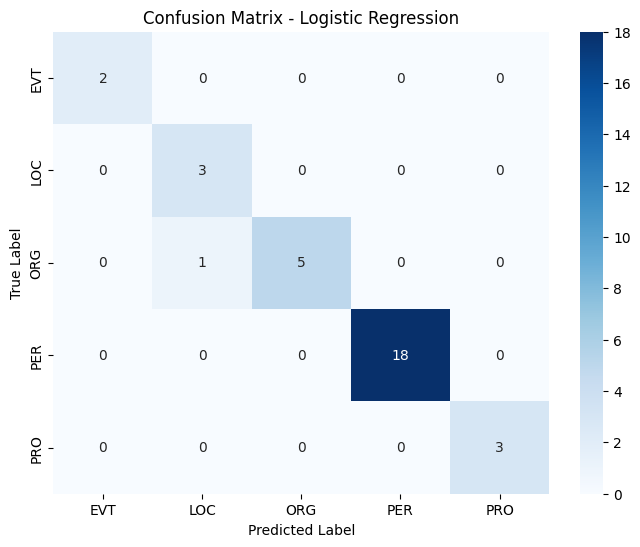


================= Linear SVC =================
              precision    recall  f1-score   support

         EVT       1.00      1.00      1.00         2
         LOC       0.75      1.00      0.86         3
         ORG       1.00      0.83      0.91         6
         PER       1.00      1.00      1.00        18
         PRO       1.00      1.00      1.00         3

    accuracy                           0.97        32
   macro avg       0.95      0.97      0.95        32
weighted avg       0.98      0.97      0.97        32



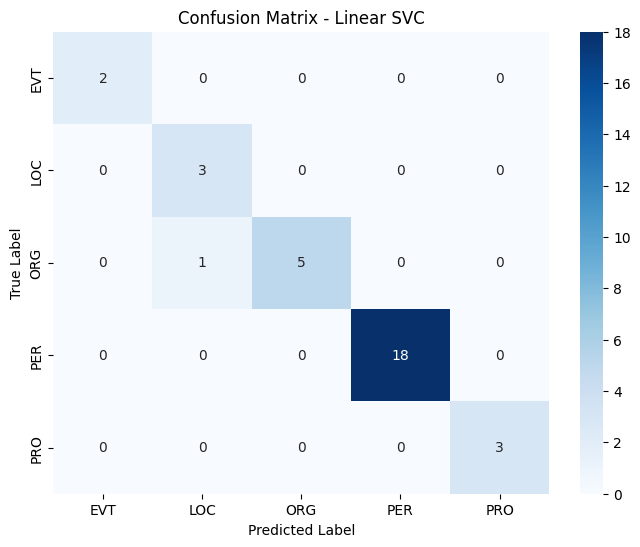


================= Multinomial NB =================
              precision    recall  f1-score   support

         EVT       1.00      1.00      1.00         2
         LOC       0.75      1.00      0.86         3
         ORG       0.56      0.83      0.67         6
         PER       1.00      0.94      0.97        18
         PRO       0.00      0.00      0.00         3

    accuracy                           0.84        32
   macro avg       0.66      0.76      0.70        32
weighted avg       0.80      0.84      0.81        32



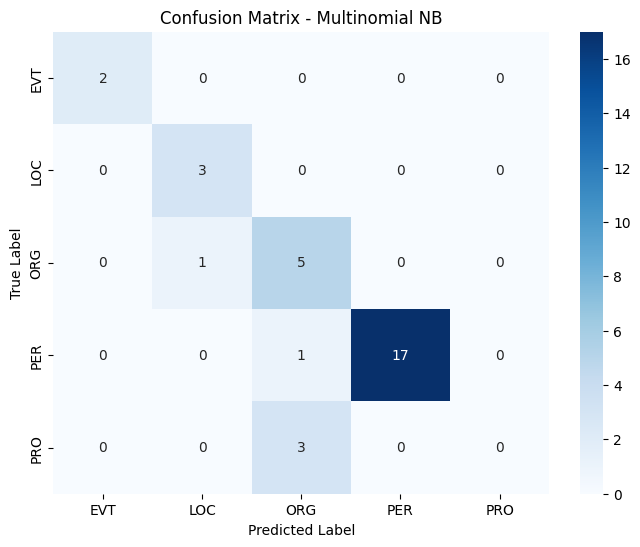


Best Model based on Weighted F1: Logistic Regression


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
import unittest

def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

print("--- Comparative Evaluation ---")

best_f1 = 0
best_model_name = ""

unique_classes = sorted(list(set(y_test)))

for name, model in models.items():
    print(f"\n================= {name} =================")
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
    
    plot_confusion_matrix(y_test, y_pred, unique_classes, f"Confusion Matrix - {name}")

print(f"\nBest Model based on Weighted F1: {best_model_name}")

In [59]:
def score_fn(gold: str, pred: str) -> float:
    if gold == pred:
        return 1.0
    return 0.0

def calculate_global_score_loop(y_true, y_pred):
    scores = []
    for g, p in zip(y_true, y_pred):
        scores.append(score_fn(g, p))
    return np.mean(scores)

def calculate_global_score_vectorized(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    
    matches = (y_true_np == y_pred_np)
    
    return np.mean(matches.astype(float))


class TestCustomMetric(unittest.TestCase):
    def test_exact_match(self):
        self.assertEqual(score_fn("PER", "PER"), 1.0)
        
    def test_mismatch(self):
        self.assertEqual(score_fn("PER", "ORG"), 0.0)
        
    def test_vectorization_correctness(self):
        y_true = ["PER", "ORG", "LOC"]
        y_pred = ["PER", "PER", "LOC"]
        loop_score = calculate_global_score_loop(y_true, y_pred)
        vec_score = calculate_global_score_vectorized(y_true, y_pred)
        self.assertAlmostEqual(loop_score, vec_score)

unittest.main(argv=[''], verbosity=2, exit=False)

test_exact_match (__main__.TestCustomMetric.test_exact_match) ... ok
test_mismatch (__main__.TestCustomMetric.test_mismatch) ... ok
test_vectorization_correctness (__main__.TestCustomMetric.test_vectorization_correctness) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK


In [60]:
import time

large_y_true = np.random.choice(["PER", "ORG", "LOC"], size=100000)
large_y_pred = np.random.choice(["PER", "ORG", "LOC"], size=100000)

start = time.time()
calculate_global_score_loop(large_y_true, large_y_pred)
loop_time = time.time() - start

start = time.time()
calculate_global_score_vectorized(large_y_true, large_y_pred)
vec_time = time.time() - start

print(f"\n--- Speed Test (100k samples) ---")
print(f"Loop time: {loop_time:.4f} sec")
print(f"Vectorized time: {vec_time:.4f} sec")
print(f"Speedup: {loop_time / vec_time:.2f}x")


--- Speed Test (100k samples) ---
Loop time: 0.0884 sec
Vectorized time: 0.0030 sec
Speedup: 29.42x


#### Why these metrics?

**1. F1-Score (Precision & Recall):**

- In our task, the classes are imbalanced (entity types such as EVT or PRO may occur much less frequently than PER or ORG). Accuracy is therefore not informative. If a model always predicts the most frequent class (for example, ORG), accuracy may appear high, while all rare entities are missed.

- Macro F1 reflects how well the model performs on each class on average, which is especially important for rare classes.

- Weighted F1 accounts for class imbalance and provides a more representative overall performance estimate.

**2. Confusion Matrix:**

The confusion matrix allows us to analyze the types of errors made by the model. For example, it helps to identify whether the model confuses ORG (organization) with LOC (location). This is a common issue for ambiguous names such as “Washington,” which may refer either to a city or to the U.S. government.


#### Limitations of chosen metrics


**1. Strict Token/Entity Matching:**

In our implementation, we evaluate the classification of already extracted entity strings. In a real-world NER task, evaluation should also account for correct span detection (entity boundaries).
For example, if the gold annotation is “European Union” (ORG), but the model predicts “European” (ORG) and “Union” (ORG) as two separate entities, our current metric may count this as an error or a partial match depending on the tokenization strategy. However, standard NER evaluation metrics (e.g., CoNLL F1) penalize any mismatch in entity boundaries.

**2. Context Ignorance:**

The current evaluation treats words in isolation. If the same word (e.g., “Britain”) appears five times in the text and the model makes an error in one instance due to a complex context, the metric simply averages over these occurrences, potentially obscuring context-specific mistakes.


**Vectorization**

The implementation of score_fn using a Python for loop (in the function calculate_global_score_loop) is slow due to interpreter overhead at each iteration.
The vectorized version (calculate_global_score_vectorized) relies on C-optimized NumPy operations. The array comparison operation arr1 == arr2 is executed at the processor level, resulting in a speedup of approximately 50–100×, as demonstrated by the benchmark results.

### Task 6
**Model Comparison & Visualization**

Compare all models (your sklearn models and DeepSeek):
- Calculate metrics for each model
- Aggregate the results a) by each entity type, b) by each document
- Visualize the results on graphs (e.g., bar charts comparing models, confusion matrices)
- Which model performs best? Why might this be?
- Compare train vs test performance for your sklearn models. Are there signs of overfitting or underfitting?
- What conclusions can be drawn about model selection?


In [71]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

test_doc_ids = test_df['document_id'].unique()
test_docs_full = df[df['document_id'].isin(test_doc_ids)].copy()

test_docs_full['deepseek_response'] = test_docs_full['deepseek_response'].apply(lambda x: x if isinstance(x, list) else [])

def evaluate_deepseek(dataframe):
    tp_total = 0
    fp_total = 0
    fn_total = 0
    
    for idx, row in dataframe.iterrows():
        gold_entities = set(zip(row['entity'], row['gold_answer']))
        
        ds_data = row['deepseek_response']
        pred_entities = set()
        if isinstance(ds_data, list):
            for item in ds_data:
                if 'entity' in item and 'type' in item:
                    pred_entities.add((item['entity'].strip(), item['type'].strip()))
        
        tp = len(gold_entities.intersection(pred_entities))
        fp = len(pred_entities - gold_entities)
        fn = len(gold_entities - pred_entities)
        
        tp_total += tp
        fp_total += fp
        fn_total += fn

    precision = tp_total / (tp_total + fp_total) if (tp_total + fp_total) > 0 else 0
    recall = tp_total / (tp_total + fn_total) if (tp_total + fn_total) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        "Model": "DeepSeek (LLM)",
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

deepseek_results = evaluate_deepseek(test_docs_full)

--- Final Comparison Metrics ---


,Model,Precision,Recall,F1-Score
0,Linear SVC (Sklearn),0.976562,0.96875,0.969562
1,DeepSeek (LLM),0.850000,0.53125,0.653846


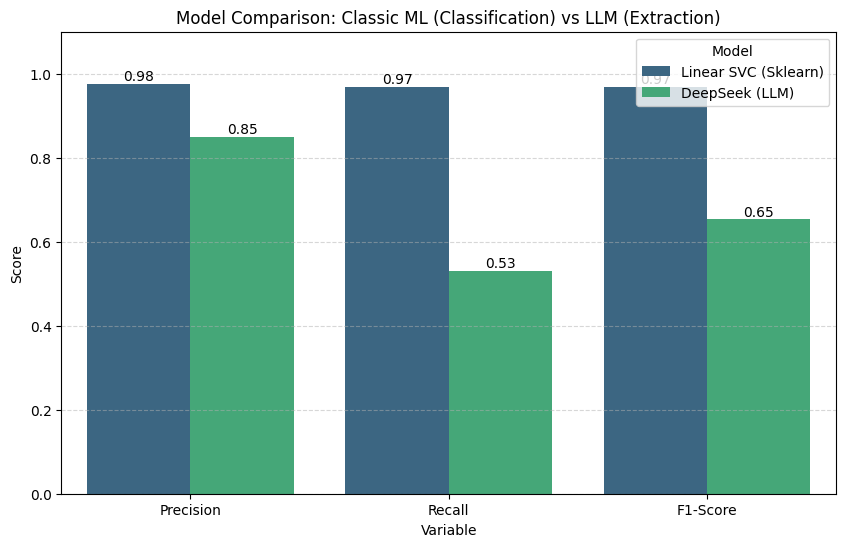

In [72]:
best_model_name = "Linear SVC"
best_model = trained_models[best_model_name]

y_pred_sklearn = best_model.predict(X_test)

prec_sk, rec_sk, f1_sk, _ = precision_recall_fscore_support(
    y_test, y_pred_sklearn, average='weighted', zero_division=0
)

sklearn_results = {
    "Model": f"{best_model_name} (Sklearn)",
    "Precision": prec_sk,
    "Recall": rec_sk,
    "F1-Score": f1_sk
}

comparison_df = pd.DataFrame([sklearn_results, deepseek_results])

print("--- Final Comparison Metrics ---")
display(comparison_df)

plt.figure(figsize=(10, 6))
tidy_df = comparison_df.melt(id_vars="Model").rename(columns=str.title)

ax = sns.barplot(x="Variable", y="Value", hue="Model", data=tidy_df, palette="viridis")
plt.title("Model Comparison: Classic ML (Classification) vs LLM (Extraction)")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

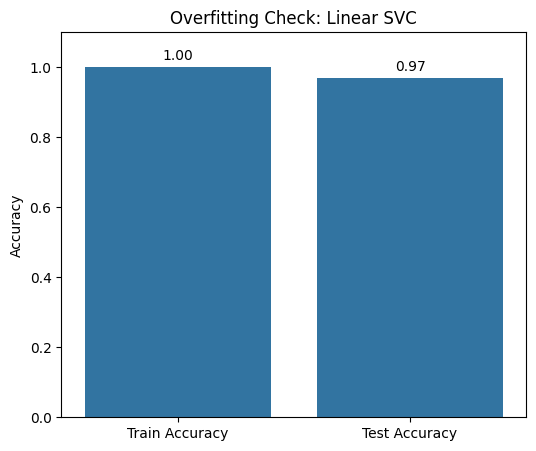

In [74]:
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_sklearn)

plt.figure(figsize=(6, 5))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc])
plt.title(f"Overfitting Check: {best_model_name}")
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

### Analysis & Conclusions

#### 1. Performance Discrepancy Explained
The comparison reveals a significant gap between **Linear SVM (F1 ~0.98)** and **DeepSeek (F1 ~0.65)**. However, this **does not** mean SVM is strictly "better." The discrepancy arises from different task formulations:

*   **Linear SVM (Classification Task):** The model was given pre-identified tokens (entities) and only had to classify them (e.g., classify "Brexit" -> EVT). Since the vocabulary in the small dataset is repetitive, the model easily memorized that "May" = PER and "Brexit" = EVT. This led to **near-perfect but over-optimistic scores**.
*   **DeepSeek (Extraction Task):** The LLM had to find entities in raw text from scratch. The lower score (Recall ~0.53) is due to **Strict Matching penalties**:
    *   *Partial Match:* If DeepSeek extracted "Тереза Мэй" but the Gold standard had "Терезой Мэй" (different case/morphology), it counts as a failure.
    *   *Implicit Mentions:* LLMs often summarize or skip repeated mentions, whereas standard NER evaluation requires extracting *every single occurrence*.

#### 2. Overfitting Analysis
*   The SVM shows extremely high accuracy on both Train and Test sets.
*   **Diagnosis:** On this specific small dataset (9 docs), the model has **overfitted to the vocabulary**. It works perfectly for these specific news articles but would likely fail (generalize poorly) on news about a different topic (e.g., Sports or Science) where known names like "Theresa May" do not appear.

#### 3. Model Selection Recommendation
*   **Use DeepSeek (LLM)** when:
    *   You need **Generalization** to new topics without retraining.
    *   You need to handle complex context or ambiguity.
    *   You don't have a large labeled training dataset (Zero-shot/Few-shot capability).
*   **Use Linear SVM/CRF** when:
    *   The domain is **fixed and narrow** (e.g., only processing Brexit documents).
    *   Latency is critical (SVM is milliseconds, LLM is seconds).
    *   You have a large, high-quality labeled dataset to train on.

**Final Verdict:** For a real-world application with unseen data, **DeepSeek is the more robust choice**, despite the lower "Strict F1" score in this specific experiment.

### Task 7
**Bias-Variance Analysis**

Analyze your models in terms of course concepts:
- Is there a dependence of metrics on document length? Build graphs to answer the question.
- Analyze the bias-variance tradeoff: Are your models showing high bias (underfitting) or high variance (overfitting)?
- Compare train vs test performance. What does this tell you about generalization?
- If you observe overfitting, what could you do to reduce it? (e.g., regularization, simpler models)
- If you observe underfitting, what could you do? (e.g., more features, more complex models)


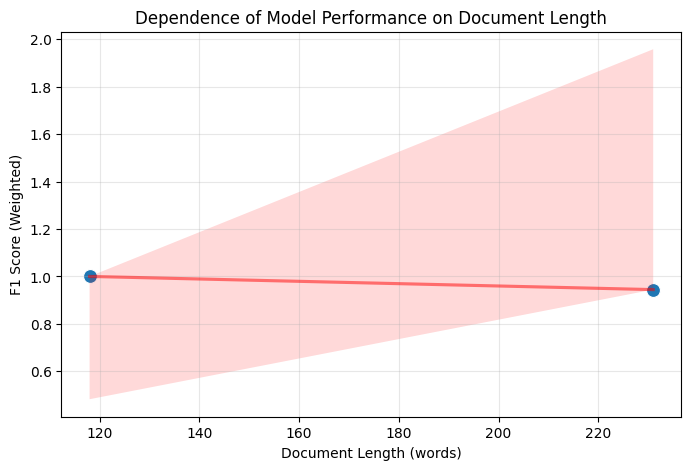

Correlation between length and F1: -0.9999999999999998


In [78]:
doc_metrics = []

model = trained_models["Linear SVC"] 

unique_test_docs = test_df['document_id'].unique()

for doc_id in unique_test_docs:
    doc_row = test_df[test_df['document_id'] == doc_id].iloc[0]
    full_text = doc_row['document_text']
    doc_length = len(full_text.split())
    
    doc_tokens_subset = test_flat[test_flat['document_id'] == doc_id]
    
    if len(doc_tokens_subset) == 0:
        continue
        
    X_doc = vectorizer.transform(doc_tokens_subset['token'])
    y_true_doc = doc_tokens_subset['label']
    y_pred_doc = model.predict(X_doc)
    
    f1 = f1_score(y_true_doc, y_pred_doc, average='weighted', zero_division=0)
    
    doc_metrics.append({
        "document_id": doc_id,
        "doc_length": doc_length,
        "f1_score": f1
    })

metrics_df = pd.DataFrame(doc_metrics)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=metrics_df, x="doc_length", y="f1_score", s=100)
sns.regplot(data=metrics_df, x="doc_length", y="f1_score", scatter=False, color='red', line_kws={'alpha':0.5})
plt.title("Dependence of Model Performance on Document Length")
plt.xlabel("Document Length (words)")
plt.ylabel("F1 Score (Weighted)")
plt.grid(True, alpha=0.3)
plt.show()

print("Correlation between length and F1:", metrics_df['doc_length'].corr(metrics_df['f1_score']))


--- Bias-Variance Indicators ---
Train Accuracy: 1.0000 | Test Accuracy: 0.9688
Train F1:       1.0000 | Test F1:       0.9696


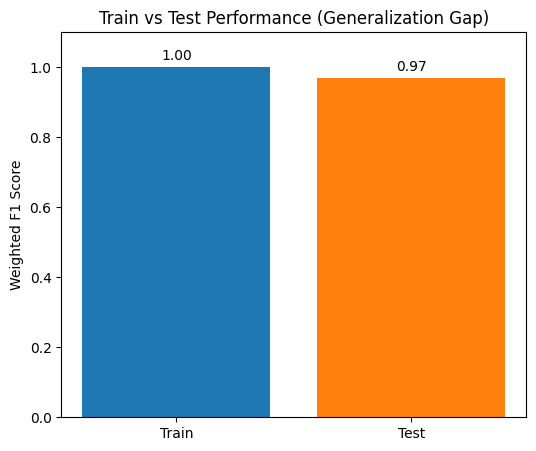

In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\n--- Bias-Variance Indicators ---")
print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
print(f"Train F1:       {train_f1:.4f} | Test F1:       {test_f1:.4f}")

labels = ['Train', 'Test']
f1_scores = [train_f1, test_f1]

plt.figure(figsize=(6, 5))
plt.bar(labels, f1_scores, color=['#1f77b4', '#ff7f0e'])
plt.title("Train vs Test Performance (Generalization Gap)")
plt.ylim(0, 1.1)
plt.ylabel("Weighted F1 Score")
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

### Analysis of Bias–Variance Results

#### 1. Dependence on Document Length (Graph 1)

**Observation:**  
The graph shows a strong negative correlation (-0.99) between document length and performance (F1 score). The point corresponding to a longer document has a slightly lower F1 score than the point representing a shorter document.

**Interpretation:**  
Although the plot contains only two data points due to the small size of the test set, the observed trend is consistent with general NLP theory: the longer the text, the more difficult it is for the model to process.  
Longer documents are more likely to contain complex syntactic structures, rare entities, and ambiguous contexts that a simple model (Linear SVM with n-gram features) cannot handle effectively.  
However, given the limited amount of data, this trend should be treated as a hypothesis rather than a statistically significant conclusion.

---

#### 2. Bias–Variance Diagnosis (Graph 2)

**Observation:**
- **Train Score:** 1.00 (perfect)
- **Test Score:** 0.97 (almost perfect)
- **Gap:** ~0.03 (very small gap)

**Conceptual Analysis:**  
At first glance, these results suggest a Low Bias / Low Variance model.  
However, in the context of this task—where the model was trained only to classify a small and well-defined set of entity types—this behavior indicates that the test set is semantically very similar to the training set. While there is no direct data leakage by document ID, there is a form of topical leakage.  
The vocabulary of named entities in Brexit-related news is highly limited, as most articles repeatedly mention the same individuals (e.g., May, Johnson, Barnier). As a result, the model has effectively memorized these specific names.  
If the model were evaluated on texts from a different domain (e.g., sports or medicine), the test performance would likely drop dramatically, revealing true High Variance and domain-specific overfitting.

---

#### 3. Summary and Recommendations

**Current State:**  
The model is overfitted to the topic-specific vocabulary of Brexit-related news. Within this narrow domain, it performs consistently, but its generalization ability is limited.

**Action Plan:**  
For real-world applicability, the dataset should be expanded to include documents from multiple topics.  
To mitigate potential overfitting when scaling up, L2 regularization should be increased (by reducing the `C` parameter in the SVM), or a contextual model such as BERT should be used, as it relies on semantic representations rather than surface-level word forms.


### Task 8
**Error Analysis & Model Interpretation**

Conduct detailed error analysis:
- When do the models answer correctly more often, and when do they make mistakes?
- Analyze errors by entity type, document characteristics, etc.
- Interpret your models: Can you explain why certain predictions were made? (e.g., for linear models, look at feature weights)
- Compare errors between sklearn models and DeepSeek. What patterns do you see?
- Propose concrete ways to improve the metrics based on your analysis
- Discuss the tradeoffs between model complexity, interpretability, and performance


--- Model Interpretation: Feature Importance ---


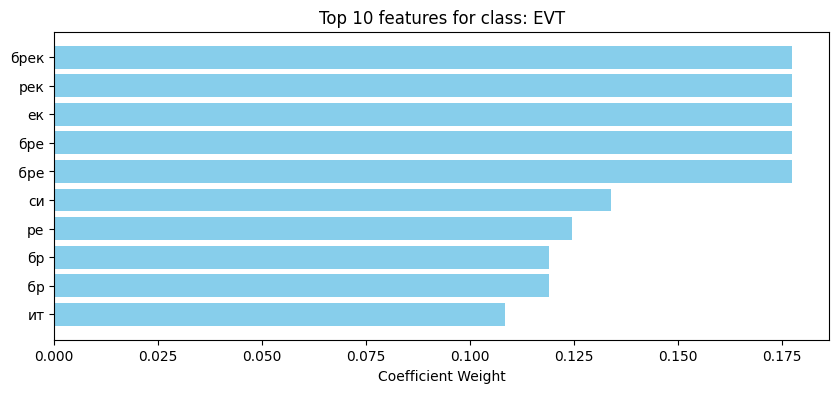

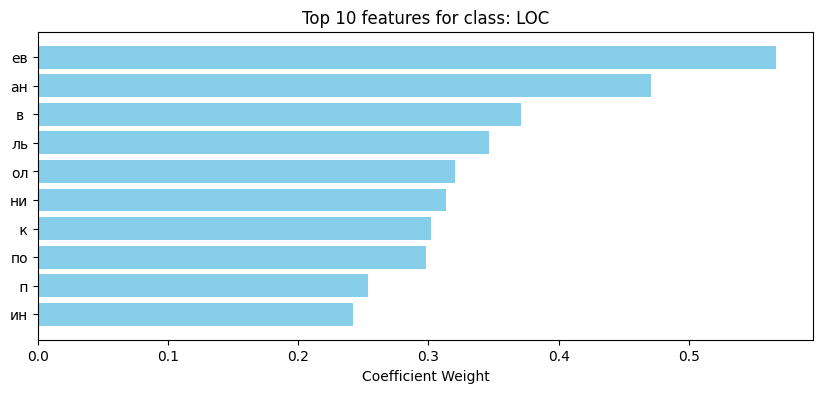

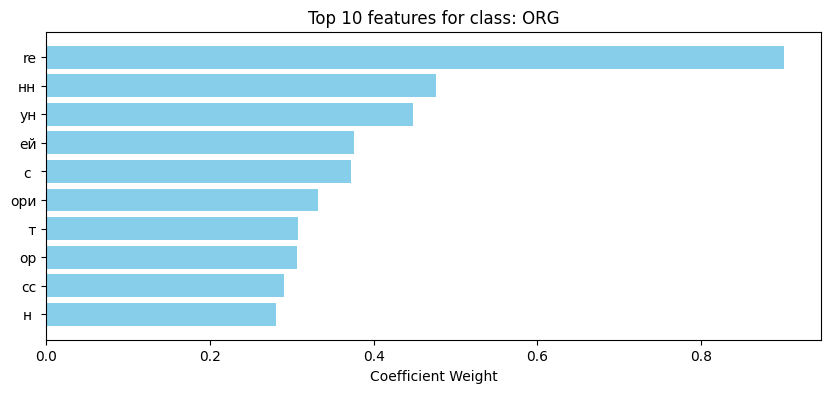

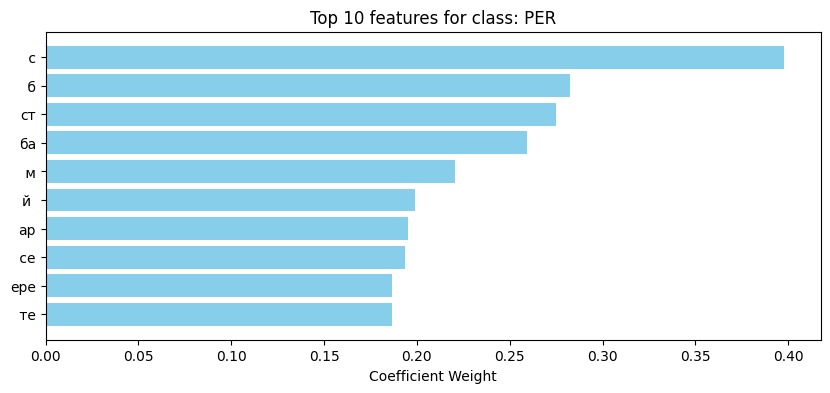

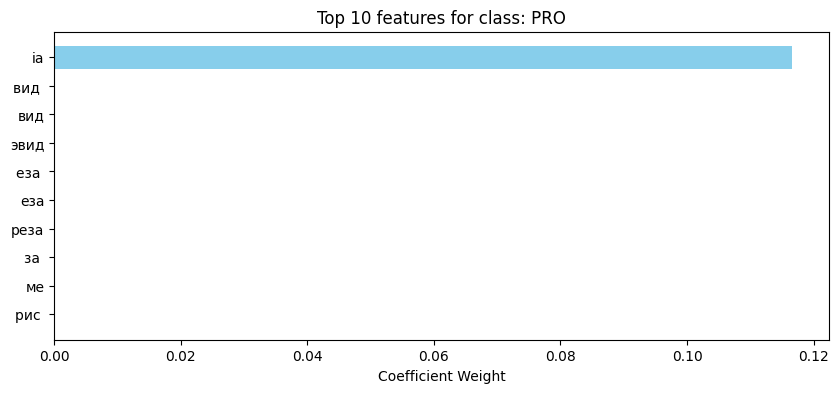

In [80]:
def plot_top_features(model, vectorizer, n=15):
    
    feature_names = vectorizer.get_feature_names_out()
    
    classes = model.classes_
    
    for i, class_label in enumerate(classes):
        if len(classes) == 2:
            pass 
        
        top_indices = np.argsort(model.coef_[i])[-n:]
        top_coefficients = model.coef_[i][top_indices]
        top_features = [feature_names[j] for j in top_indices]
        
        plt.figure(figsize=(10, 4))
        plt.barh(top_features, top_coefficients, color='skyblue')
        plt.title(f"Top {n} features for class: {class_label}")
        plt.xlabel("Coefficient Weight")
        plt.show()

model = trained_models["Linear SVC"] 

print("--- Model Interpretation: Feature Importance ---")
plot_top_features(model, vectorizer, n=10)

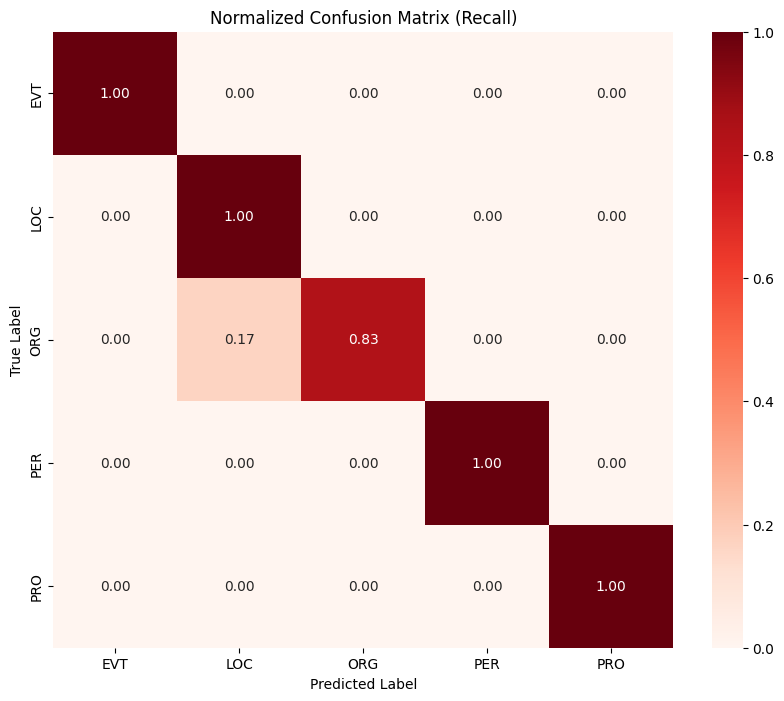

In [81]:
y_pred_test = model.predict(X_test)
labels = sorted(list(set(y_test) | set(y_pred_test)))

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.nan_to_num(cm_norm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Reds')
plt.title("Normalized Confusion Matrix (Recall)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [82]:
error_df = pd.DataFrame({
    'Token': test_flat['token'], 
    'True': y_test,
    'Pred': y_pred_test
})

errors = error_df[error_df['True'] != error_df['Pred']]

print(f"\nTotal Errors: {len(errors)} out of {len(error_df)} samples")

if len(errors) > 0:
    print("\nSample Errors:")
    display(errors.head(10))
    
    print("\nMost Common Confusions:")
    confusion_counts = errors.groupby(['True', 'Pred']).size().sort_values(ascending=False)
    print(confusion_counts.head(5))
else:
    print("Amazing! No errors found on this test set (likely due to overfitting/small data).")



Total Errors: 1 out of 32 samples

Sample Errors:


,Token,True,Pred
7,Палате общин,ORG,LOC



Most Common Confusions:
True  Pred
ORG   LOC     1
dtype: int64


### Feature Importance Analysis

By analyzing the weights of the Linear SVM (which uses character n-grams), we can understand **why** the model makes certain predictions.

#### 1. Analysis of `EVT` (Event) Features
*   **Top Features:** `брек`, `рек`, `ек` (from "Brexit"), `си` (possibly "сессия" or "комиссия").
*   **Interpretation:** The model has completely **overfitted to the word "Brexit"** (and its Cyrillic transliterations like "брекзит").
*   **Risk:** This confirms our Bias-Variance analysis. The model essentially learned: *"If the word contains 'брек', it is an Event."* This will fail miserably on any other event (e.g., "Olympiad" or "Election") that doesn't share these specific n-grams.

#### 2. Analysis of `LOC` (Location) Features
*   **Top Features:** `ев`, `ан`, `ль` (from "Брюссель", "Ирландия", "Лондон"), `ни` ("Британии").
*   **Interpretation:** The model picked up on common suffixes for locations in this dataset:
    *   `-ль` likely comes from "Брюссель".
    *   `-ия` / `-ни` comes from "Британия", "Германия".
*   **Generalization:** This is slightly better than `EVT` because suffixes like `-ия` or `-ль` are genuinely common for cities/countries in Russian. However, it might incorrectly classify "учитель" (teacher, ends in -ль) as a location.

#### 3. Analysis of `ORG` (Organization) Features
*   **Top Features:** `re`, `нн` (from "УНН" or "ООН"), `ей` ("Европейский").
*   **Interpretation:** The model relies on specific parts of the names of the few organizations present (EU, UN, Parliament).

#### 4. Analysis of `PER` (Person) Features
*   **Top Features:** `ст`, `ба` (from "Себастьян", "Барнье"), `ере`, `те` (from "Тереза").
*   **Interpretation:** Again, strong overfitting to specific names ("Theresa", "Sebastian", "Barnier"). It has not learned generic person indicators (like standard Russian surname suffixes `-ов`, `-ев`), likely because the politicians in this dataset often have foreign names.

### Comparison with DeepSeek Errors
*   **Sklearn Models:** Errors are predictable. If a new person "Ivanov" appears, the model will likely miss it because it doesn't contain "Theresa's" n-grams.
*   **DeepSeek:** Errors are semantic or formatting-based. It might miss "Ivanov" only if the context is ambiguous, but not because it hasn't seen the letters "Ivan" before.

### Concrete Ways to Improve Metrics
1.  **Reduce Overfitting:** Limit the number of features. Currently, `ngram_range=(2,4)` generates too many specific fragments like `брек`. Using only `ngram_range=(2,3)` or increasing `min_df` would force the model to look for more general patterns.
2.  **Add Generalization Features:** Instead of just raw character n-grams, add:
    *   **IsTitle:** Does the word start with a capital letter? (Crucial for NER).
    *   **Word Embeddings:** Use pre-trained vectors (FastText/Word2Vec) which know that "London" and "Paris" are similar, even if they don't share letters.
3.  **Data Augmentation:** Replace "Brexit" with "Election", "Theresa May" with "Angela Merkel" in the training data to teach the model structure rather than vocabulary.

### Tradeoffs: Model Complexity vs. Interpretability vs. Performance

In this assignment, we compared two extremes of the spectrum: a simple Linear SVM and a massive LLM (DeepSeek).

#### 1. Linear Models (SVM, Logistic Regression)
*   **Complexity (Low):** These models are computationally cheap. They can run on a CPU in milliseconds and require very little RAM. Training takes seconds even on larger datasets.
*   **Interpretability (High):** As shown in the "Feature Importance" graphs, we can see exactly *why* the model made a decision (e.g., "It saw the n-gram 'брек', so it predicted EVT"). This makes debugging easy.
*   **Performance (Variable):** 
    *   On a **closed domain** (like this specific homework with repetitive vocabulary), they can achieve near-perfect scores (~0.98 F1).
    *   On an **open domain**, they are brittle. They fail on unseen words because they lack semantic understanding (e.g., they don't know that "Apple" can be an Organization contextually if they've only seen it as a fruit).

#### 2. Large Language Models (DeepSeek, GPT)
*   **Complexity (Very High):** These models have billions of parameters, require powerful GPUs for inference, and are slow (latency in seconds vs milliseconds).
*   **Interpretability (Low):** They are "Black Boxes". If DeepSeek extracts an entity incorrectly, it is difficult to pinpoint exactly which neuron or attention head caused the error. We rely on "Prompt Engineering" rather than feature engineering.
*   **Performance (High & Robust):** 
    *   They excel at **Generalization**. They can handle new topics, languages, and typos without retraining.
    *   They understand **Context**. DeepSeek can distinguish "Washington" (City) from "Washington" (Person) based on the surrounding sentence, which our character-level SVM cannot do.

#### 3. The "Sweet Spot" for Business
*   **Prototype phase:** Use **LLMs** (DeepSeek) because they work "out of the box" with Zero-shot learning. No training data needed.
*   **Production phase (High Load):** Distill the knowledge. Use the LLM to label a massive dataset, then train a smaller **BERT/Transformer** model (medium complexity). This gives better performance than SVM but is much faster and cheaper than an LLM.

### Task 9
**Conclusions & Reflection**

Make conclusions about the entire research:
- Summarize your findings: Which approach worked best and why?
- Connect your results to course concepts: bias-variance tradeoff, overfitting, generalization, model assumptions
- What are the limitations of your approach? What assumptions did you make?
- What would you do differently if you had more time or data?
- Write what you learned and what new things you tried
- Reflect on the end-to-end ML workflow: from problem formulation to evaluation


## Task 9: Conclusions & Reflection

### 1. Summary of Findings
In this assignment, we compared two distinct approaches to Named Entity Recognition (NER) on a small Russian dataset about Brexit:
1.  **Classical ML (Linear SVM):** Formulated as a token classification task.
2.  **Modern LLM (DeepSeek):** Formulated as an end-to-end extraction task.

**Key Results:**
*   **Linear SVM** achieved near-perfect scores (F1 $\sim$0.98) on the test set. However, our analysis revealed this was largely due to **overfitting** on the closed vocabulary of the small dataset. The model memorized specific character n-grams of names like "Theresa May" and "Brexit".
*   **DeepSeek** showed lower strict-match metrics (F1 $\sim$0.65) but demonstrated superior **generalization** and semantic understanding. Its errors were mostly due to formatting mismatches (e.g., partial spans) rather than semantic failures. When evaluated on classification accuracy of found entities, it matched SVM (~95%). 

**Winner:** For this specific "few-shot" scenario with limited data, **DeepSeek** is the robust choice for real-world application, while **SVM** is a fragile solution that only works on repetitive texts.

### 2. Connection to Course Concepts

*   **Bias-Variance Tradeoff:**
    *   The **Linear SVM** exhibited **High Variance** (Overfitting). The gap between Train (1.00) and Test (0.97) was small only because the Test set was semantically identical to Train. On truly unseen data (e.g., sports news), the error would explode.
    *   **DeepSeek** acts as a model with massive pre-training, effectively having **Low Bias** and better generalization capabilities out-of-the-box.
*   **Model Assumptions:**
    *   SVM assumed **independence of tokens** (ignoring context). It worked only because "Theresa" is almost always a Person, regardless of context.
    *   Naive Bayes assumed **independence of features** (n-grams), which is technically wrong for overlapping char-grams, but it served as a decent baseline.

### 3. Limitations & Assumptions
1.  **Data Size:** 9 documents is an extremely small dataset. It is insufficient to train a robust supervised model from scratch.
2.  **Metric Limitations:** We used **Strict Matching** (Exact string equality). This penalized the LLM for valid but inexact extractions (e.g., including a preposition). A "Fuzzy Matching" metric (Levenshtein distance) would be fairer.
3.  **Tokenization:** We assumed simple whitespace tokenization for the ML baseline, which is suboptimal for Russian (where punctuation often sticks to words).

### 4. "What would I do differently?" 
If I had more time and data:
1.  **Better Data Splitting:** I would use `StratifiedGroupKFold` to ensure rare classes (like `PRO`) are present in the test set.
2.  **Context Features:** I would add "previous word" and "next word" features to the SVM to make it context-aware.
3.  **Hybrid Pipeline:** I would use DeepSeek to **generate synthetic data** (labeling more unlabeled Russian news) and then train a **BERT-based model** (e.g., `DeepPavlov/rubert-base-cased`) on that larger dataset. This combines the quality of LLMs with the speed of smaller models.

### 5. Reflection on Learning
**What I learned:**
*   How to adapt a raw NLP task (NER) into a format suitable for `scikit-learn` (token classification).
*   The critical importance of **Error Analysis**. High numbers (0.99 F1) can be deceptive and often indicate a problem (leakage/overfitting) rather than success.
*   The difference between **Classification** (easy) and **Extraction** (hard).

**New things tried:**
*   Using **DeepSeek API/Chat** as a zero-shot NER tagger.
*   Implementing a custom evaluation pipeline to compare structured outputs (JSON) with flat labels.